In [2]:
#working on getting the data to fold
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [3]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters and errors in 2D array
arg: my_fitter = fit, x = integer value offset

'''
def getFits_lor(my_fitter, x):
    
    di = my_fitter.get_fit_results()
    results = [di[key] for key in di.keys()]
    
    E0 = [results[0+6*x], results[1+6*x]]
    gamma = [results[2+3*x], results[3+6*x]]
    A = [results[4+3*x], results[+6*x]]
    B = [results[6+3*x], results[7+6*x]]
    
    return [E0, gamma, A, B]

'''
folds data on to first 256 channels (LHS<-RHS)
returns: array of [yData, yErrors]

This might not be working well
Should maybe take a center/deal with not integer bins
'''
def fold(data_c, dataE):
    center = 256
    data = []
    dataErr = []
    
    for i in range(0, center):
#         data.append(data_c[i]+data_c[511-i])
#         data.append(data_c[i]+(data_c[511-i] + data_c[510-i] )/2.0 )
        if i == 0:
            data.append(data_c[i]+(data_c[511-i] + data_c[i])/2.0 )
        else:
            data.append(data_c[i]+(data_c[511-i] + data_c[512-i] )/2.0 )
        
        dataErr.append(np.sqrt(dataE[i]+dataE[511-i]))

#         print(i, 511-i, 512-i)
#     print(len(data))
    
    return [data, dataErr]

"""
Takes array of channels, and m, b of linear function
Returns array of velocities [mmsec]
"""
def chan_to_velo(channels, m, b):
    v = [m[0]*c + b[0] for c in channels]
#     vE = 
    
    return v

"""
"""
def average(a, b, offset):
    
    center = (a[0] - b[0]) / 2.0 + offset[0]
    err = np.sqrt((np.sqrt((a[1])**2 + (b[1])**2)*0.5)**2+(offset[1])**2)
    
    return [center, err]
    

#one lorentzians with offset
def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

#2 lorentzians added together with one offset
def lorentzian2(E, E0, gamma, A, E0_2, gamma_2, A_2, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + b

#6 lorentzians added together with one offset
def lorentzian6(E, E0, gamma, A, E0_2, gamma_2, A_2, E0_3, gamma_3, A_3, E0_4, gamma_4, A_4, E0_5, gamma_5, A_5, E0_6, gamma_6, A_6, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2
    denom_3 = (E-E0_3)**2 + (gamma_3/2)**2
    denom_4 = (E-E0_4)**2 + (gamma_4/2)**2
    denom_5 = (E-E0_5)**2 + (gamma_5/2)**2
    denom_6 = (E-E0_6)**2 + (gamma_6/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_4*gamma_4**2/denom_4 + A_5*gamma_5**2/denom_5 + A_6*gamma_6**2/denom_6 + b

def lorentzian6const(E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, center_3, dist_3, gamma_3, A_3, b):

    denom = (E-(center - dist))**2 + (gamma/2)**2
    denom_2 = (E-(center_2 - dist_2))**2 + (gamma_2/2)**2
    denom_3 = (E-(center_3 - dist_3))**2 + (gamma_3/2)**2
    denom_4 = (E-(center_3 + dist_3))**2 + (gamma_3/2)**2
    denom_5 = (E-(center_2 + dist_2))**2 + (gamma_2/2)**2
    denom_6 = (E-(center + dist))**2 + (gamma/2)**2
    
    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_3*gamma_3**2/denom_4 + A_2*gamma_2**2/denom_5 + A*gamma**2/denom_6 + b
    

# Fitting folded calibration data 
REALLY big chi squared wtf

In [64]:
#loading
data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2 #last channel is oddly low so extrapolate from side two bins
ydataerr = np.sqrt(data[1])

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]

print(len(foldedData[0]), len(foldedData[1]), len(foldedData[2]) )

#for velocity matching later
#literature values (from 1-6), (mm/sec)
#Cite as: Journal of Applied Physics 42, 4339 (1971); https://doi.org/10.1063/1.1659777
litValCal = [-5.4823, -3.2473, -1.0132, 0.6624, 2.8967, 5.1338]
litValCalE = [0.0008, 0.0008, 0.0010, 0.0007, 0.0007, 0.0010]

256 256 256


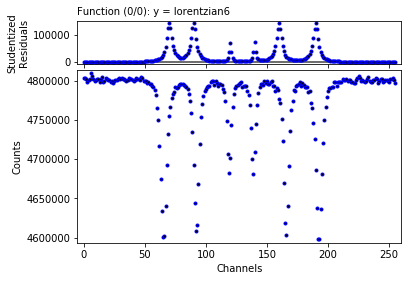

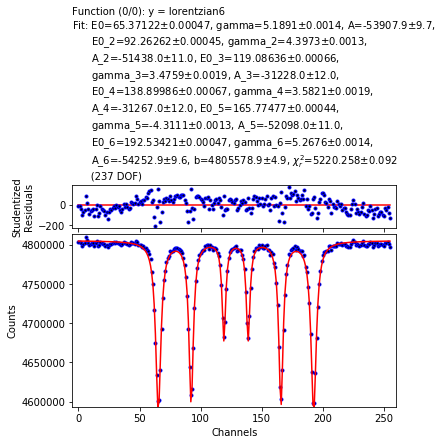


# FIT RESULTS (reduced chi squared = [5220.258164286553])
E0         = 65.3712
gamma      = 5.18914
A          = -53907.9
E0_2       = 92.2626
gamma_2    = 4.39732
A_2        = -51437.6
E0_3       = 119.086
gamma_3    = 3.47591
A_3        = -31227.6
E0_4       = 138.9
gamma_4    = 3.58213
A_4        = -31266.5
E0_5       = 165.775
gamma_5    = -4.31109
A_5        = -52097.5
E0_6       = 192.534
gamma_6    = 5.26761
A_6        = -54252.9
b          = 4.80558E+06



In [65]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()
my_fitter.print_fit_parameters()


In [66]:
# my_fitter.results
# x = my_fitter.get_fit_results()
# results = x.values()

# results = [x[key] for key in x.keys()]

# print(results)
# # print(x['E0.std'])
# print(type(results))

# ironfoil_longerdistance_Jan20_full

### Fitting unfolded calibration data 

In [75]:
data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])


dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]
dataR = [data[0][256:512], data[1][256:512], ydataerr[256:512]]

print(len(dataR[0]), len(dataL[0]))
# data[0][511]

256 256


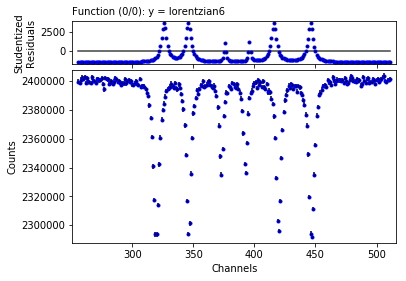

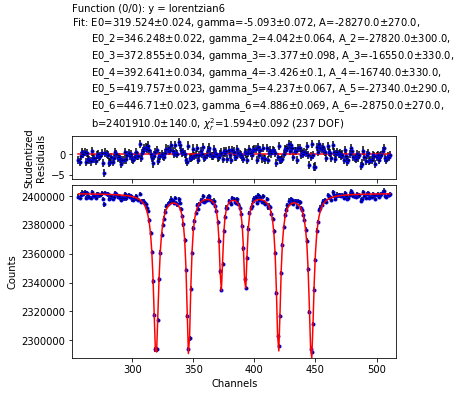


# FIT RESULTS (reduced chi squared = [1.5943904010831327])
E0         = 319.524
gamma      = -5.09296
A          = -28273.8
E0_2       = 346.248
gamma_2    = 4.04154
A_2        = -27819.7
E0_3       = 372.855
gamma_3    = -3.37701
A_3        = -16550.1
E0_4       = 392.641
gamma_4    = -3.42628
A_4        = -16737.8
E0_5       = 419.757
gamma_5    = 4.23661
A_5        = -27335.9
E0_6       = 446.71
gamma_6    = 4.88646
A_6        = -28745.4
b          = 2.40191E+06



In [76]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

guess = 'E0=326,gamma=5,A=-2e6, E0_2=346, gamma_2=5, A_2=-2e6, E0_3=376, gamma_3=2, A_3=-1e6, E0_4=396, gamma_4=2, A_4=-1e6, E0_5=416, gamma_5=5, A_5=-2e6, E0_6=446, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=dataR[0], ydata=dataR[1], eydata=dataR[2])
my_fitter.fit()
my_fitter.print_fit_parameters()

resultsRS = getFits_lor(my_fitter, 5)

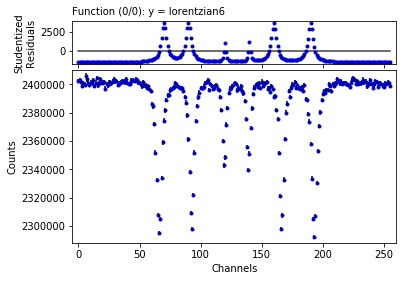

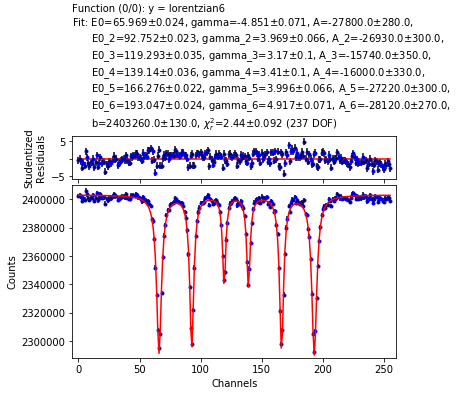

In [77]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=dataL[0], ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

resultsLS = getFits_lor(my_fitter, 0)



In [85]:
#checking center of Cal data
cent = average(resultsRS[0], resultsLS[0], resultsLS[0])

print(cent)

[256.33926095692516, 0.02941004396486447]


# Trying to Match Peaks and velocities
Velocities are from Journal of Applied Physics 42, 4339 (1971); https://doi.org/10.1063/1.1659777  
Currently only using LS of data, we don't really know the right direction yet requires isomer shift).

In [86]:
#matching to lit. values
peaksL = [getFits_lor(my_fitter, 0)[0][0], getFits_lor(my_fitter, 1)[0][0], getFits_lor(my_fitter, 2)[0][0], getFits_lor(my_fitter, 3)[0][0], getFits_lor(my_fitter, 4)[0][0], getFits_lor(my_fitter, 5)[0][0] ]
peaksLEr = [getFits_lor(my_fitter, 0)[0][1], getFits_lor(my_fitter, 1)[0][1], getFits_lor(my_fitter, 2)[0][1], getFits_lor(my_fitter, 3)[0][1], getFits_lor(my_fitter, 4)[0][1], getFits_lor(my_fitter, 5)[0][1] ]

peaksRev = [getFits_lor(my_fitter, 0)[0][0], getFits_lor(my_fitter, 1)[0][0], getFits_lor(my_fitter, 2)[0][0], getFits_lor(my_fitter, 3)[0][0], getFits_lor(my_fitter, 4)[0][0], getFits_lor(my_fitter, 5)[0][0] ]
peaksRevEr = [getFits_lor(my_fitter, 0)[0][1], getFits_lor(my_fitter, 1)[0][1], getFits_lor(my_fitter, 2)[0][1], getFits_lor(my_fitter, 3)[0][1], getFits_lor(my_fitter, 4)[0][1], getFits_lor(my_fitter, 5)[0][1] ]

peaksRev.reverse() 
peaksRevEr.reverse() 

# plt.errorbar(peaksL, litValCal, yerr=litValCalE, xerr=peaksLEr, color='b', label='normal', linestyle='', marker='o')
# plt.errorbar(peaksRev, litValCal, yerr=litValCalE, xerr=peaksRevEr, color='r', label='reversed', linestyle='', marker='o')

# plt.grid()
# plt.ylabel('Velocity [mm/sec]')
# plt.xlabel('Channel')
# plt.legend()
# plt.show()

IndexError: list index out of range

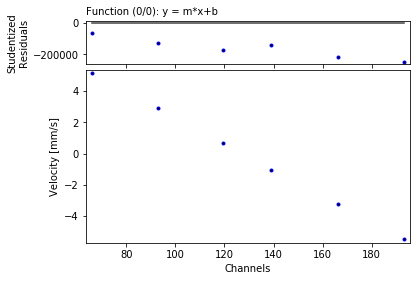

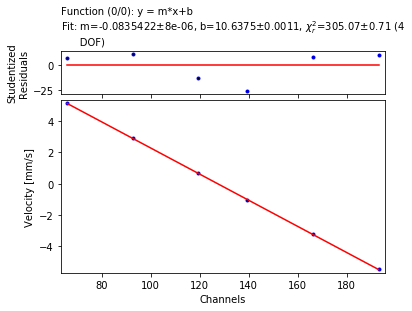


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Channels']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Velocity [mm/s]']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 44360492313.56 +/- 0.71, 4.0 DOF)
  m          = 1.0
  b          = 1.0

FIT RESULTS (reduced chi^2 = 305.07 +/- 0.71, 4 DOF)
  m          = -0.0835422 +/- 8e-06
 

In [87]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Velocity [mm/s]")
my_fitter.set_functions(f='m*x+b', p='m, b')
# my_fitter.set_data(xdata=peaksL, ydata=litValCal, eydata=litValCalE, exdata=peaksLEr)
my_fitter.set_data(xdata=peaksRev, ydata=litValCal, eydata=litValCalE, exdata=peaksRevEr)

my_fitter.fit()
# my_fitter.print_fit_parameters()

In [93]:
di = my_fitter.get_fit_results()
results = [di[key] for key in di.keys()]
m = [results[0], results[1]]
b = [results[2], results[3]]

#looking at redifining the zero velocity using the center of the cal peaks
## CHECK if we should do this
new00 = average([peaksL[3],peaksLEr[3]],[peaksL[2],peaksLEr[2]],[peaksL[2],peaksLEr[2]])
new01 = average([peaksL[4],peaksLEr[4]],[peaksL[1],peaksLEr[1]],[peaksL[1],peaksLEr[1]])
new02 = average([peaksL[5],peaksLEr[5]],[peaksL[0],peaksLEr[0]],[peaksL[0],peaksLEr[0]])

print(new00, new01, new02)

#different between linear fit to zero and center of peaks
center = average(average(new00, new01, new01), new02, new02)
# print(center)
c = np.rint(center)
#setting center as 0 velocity
# print(c)
getZero = chan_to_velo([c[0]], m, b)
b[0] = b[0]-getZero[0]
# print(chan_to_velo([c], m, b))

[129.21620819309567, 0.042520350804906494] [129.5138707054237, 0.027570059604432245] [129.50812641530698, 0.029534495669693135]


## Testing with stainless steel data 
This only has one peak so it's easy to see things with

In [82]:
#testing with stainlessSteel data which only has one peak
data = np.loadtxt(".//data//StainlessSteelFoil_Jan13_fullData.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])

dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]


#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]

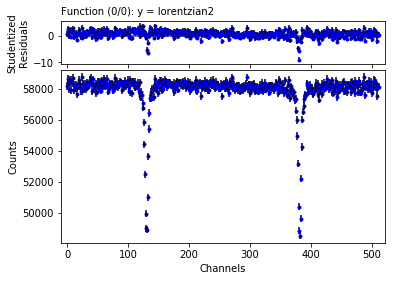

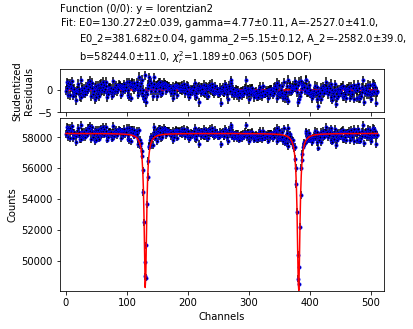


# FIT RESULTS (reduced chi squared = [1.1892902065667164])
E0         = 130.272
gamma      = 4.77292
A          = -2526.55
E0_2       = 381.682
gamma_2    = 5.14889
A_2        = -2582.1
b          = 58244



In [83]:
# lorentzian2 - for fitting 2
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=130,gamma=5,A=-2300,E0_2=382,gamma_2=5,A_2=-2300,b=58000')
my_fitter.set_data(xdata=data[0], ydata=data[1], eydata=ydataerr)
my_fitter.fit()
my_fitter.print_fit_parameters()


In [84]:
# # fitLS, fitRS - checking center of SS

# center = (fitRS[0][0] - fitLS[0][0]) / 2.0 + fitLS[0][0]
# print(center)

# 512/2

# output:
# 255.97671345493336

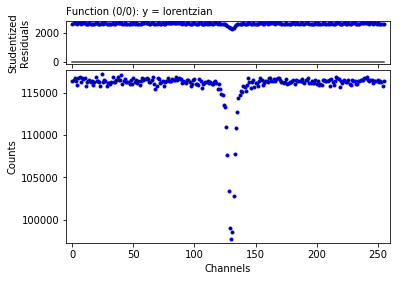

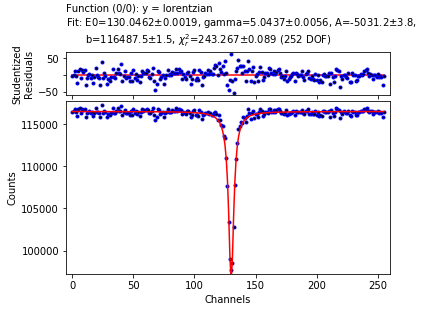


# FIT RESULTS (reduced chi squared = [243.2665885943687])
E0         = 130.046
gamma      = 5.04371
A          = -5031.23
b          = 116487



In [54]:
#512 channels - fitting folded data
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")
# help(s.data.fitter)
my_fitter.set_functions(f=lorentzian, p='E0=130,gamma=5,A=-2300,b=58000')
my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()
my_fitter.print_fit_parameters()


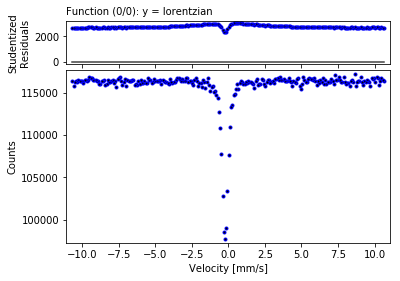

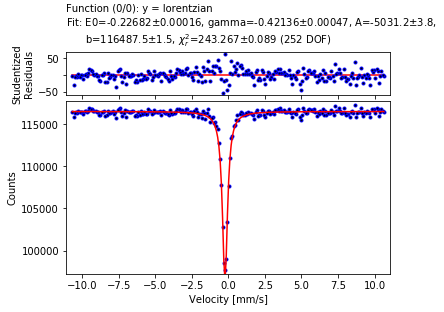


# FIT RESULTS (reduced chi squared = [243.26658859074294])
E0         = -0.226815
gamma      = -0.421363
A          = -5031.23
b          = 116487



In [55]:
#512 channels - fitting folded data
velocities = chan_to_velo(foldedData[0], m, b)

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian, p='E0=0,gamma=5,A=-2300,b=58000')
my_fitter.set_data(xdata=velocities, ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()
my_fitter.print_fit_parameters()


In [2]:
#unfolded fit - LHS of SSfoil
velocities = chan_to_velo(dataL[0], m, b)

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Velocity [mm/s]" , ylabel = "Counts")
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian, p='E0=0,gamma=5,A=-2300,b=58000')

my_fitter.set_data(xdata=velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# print(my_fitter.get_fit_results())

# resultsLS = getFits_lor(my_fitter, 0)

NameError: name 'dataL' is not defined

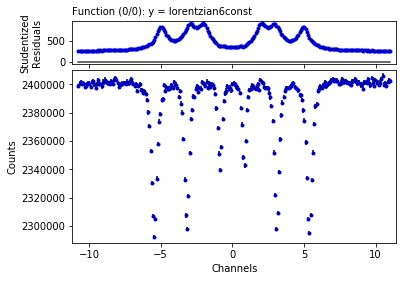

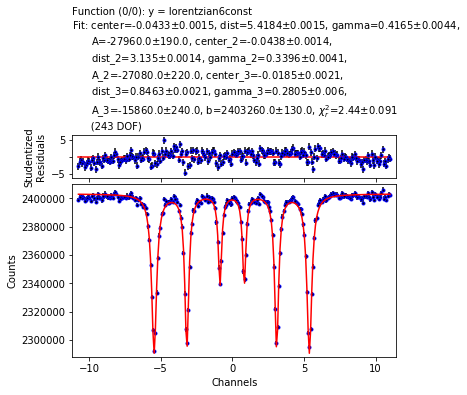


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          ['Channels']
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          ['Counts']
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 277750.774 +/- 0.091, 243.0 DOF)
  center     = 0.0
  dist       = 5.0
  gamma      = 1.0
  A          = -200000.0
  center_2   = 0.0
  dist_2     = 3.0
  gamma_2    = 1.0


In [6]:
# channel to velocity relation from calibration data
b = [11.000776381475806, 0.0011164921537570854] 
m = [-0.08527733629051013, 8.194955387410484e-06]

data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2
ydataerr = np.sqrt(data[1])


dataL = [data[0][0:256], data[1][0:256], ydataerr[0:256]]
velocities = chan_to_velo(dataL[0], m, b)

# print(len(dataR[0]), len(dataL[0]))
# data[0][511]

my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None, xlabel = "Channels" , ylabel = "Counts")

# (E, center, dist, gamma, A, center_2, dist_2, gamma_2, A_2, center_3, dist_3, gamma_3, A_3, b)
guess = 'center=0, dist=5, gamma=1, A=-2e5, center_2=0, dist_2=3, gamma_2=1, A_2=-2e5, center_3=0, dist_3 = 2, gamma_3=1, A_3=-2e5, b=2e6'

my_fitter.set_functions(f=lorentzian6const, p=guess)

my_fitter.set_data(velocities, ydata=dataL[1], eydata=dataL[2])
my_fitter.fit()
# my_fitter.print_fit_parameters()